# 如何训练小数据集

用非常少的数据来训练一个图像分类的模型，是一项非常常见的问题。

训练样本很少意味着仅包含几百到几万个图像。我们在接下来的案例中，将介绍如何构建一个模型将数据集中的猫和狗进行分类。数据集中包含2000张猫和2000张狗的图片，总共4000张照片。其中2000张用于训练模型，1000张用于验证，最后1000张用于测试模型性能。

我们将回顾一下解决这种问题的基本策略：从零开始，我们提供了少量数据来训练一个新的模型。我们将首先在我们的2000个训练样本上简单的训练一个小型卷积网络CNN来作为未来优化调整的基础，在这个过程中没有任何正则化的手法。

在这样的模型下，我们的分类准确率达到71%左右。在这个阶段，我们发现模型的主要问题是过拟合。然后，我们将介绍数据增强DataAugmentation，这是一种用于减轻机器视觉模型过拟合的强有力且通用的工具。通过数据增强，我们将改进CNN模型性能，并将模型预测准确率提高到82%。

在最后，我们将探索另外两种深度学习应用到小数据集的基本技术：使用预训练模型来进行特征提取（这将使得我们得到90%-93%的预测准确率），微调fine-tuning预训练网络（这将最终得到95%的模型预测准确率）。

总结为以下三个策略：

* 从头训练一个小型CNN模型
* 使用预训练模型进行特征提取
* fine-tuning微调预训练模型

In [1]:
import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

Platform: Windows-10-10.0.17134-SP0
Tensorflow version: 1.9.0
Keras version: 2.2.2


Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

In [3]:
import os

ROOT_DIR = os.getcwd()
DATA_PATH = "D:/Working Folder/packages/train"

In [4]:
import os
import shutil

base_dir = os.path.join(ROOT_DIR,"data/cats_and_dogs_small")
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
train_dir = os.path.join(base_dir,"train")
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

validation_dir = os.path.join(base_dir,"validation")
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir,"test")
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
    
train_cats_dir = os.path.join(train_dir,"cats")
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
    
train_dogs_dir = os.path.join(train_dir,"dogs")
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,"cats")
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
    
validation_dogs_dir = os.path.join(validation_dir,"dogs")
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
    
test_cats_dir = os.path.join(test_dir,"cats")
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
    
test_dogs_dir = os.path.join(test_dir,"dogs")
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [5]:
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(DATA_PATH,fname)
    dst = os.path.join(train_cats_dir,fname)
    if not os.path.exists(dst):
        shutil.copyfile(src,dst)
print("Copy fisrt 1000 cat images to train_cats_dit complete!")

fnames = ["cat.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(DATA_PATH,fname)
    dst = os.path.join(validation_cats_dir,fname)
    if not os.path.exists(dst):
        shutil.copyfile(src,dst)
print("Copy fisrt 500 cat images to validation_cats_dit complete!")

fnames = ["cat.{}.jpg".format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(DATA_PATH,fname)
    dst = os.path.join(test_cats_dir,fname)
    if not os.path.exists(dst):
        shutil.copyfile(src,dst)
print("Copy fisrt 500 cat images to test_cats_dit complete!")

Copy fisrt 1000 cat images to train_cats_dit complete!
Copy fisrt 500 cat images to validation_cats_dit complete!
Copy fisrt 500 cat images to test_cats_dit complete!


In [6]:
fnames = ["dog.{}.jpg".format(i) for i in range(0,1000)]
for fname in fnames:
    src = os.path.join(DATA_PATH,fname)
    dst = os.path.join(train_dogs_dir,fname)
    if not os.path.exists(dst):
        shutil.copyfile(src,dst)
print("Copy fisrt 1000 dog images to train_dogs_dit complete!")

fnames = ["dog.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(DATA_PATH,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    if not os.path.exists(dst):
        shutil.copyfile(src,dst)
print("Copy fisrt 500 dog images to validation_dogs_dit complete!")

fnames = ["dog.{}.jpg".format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(DATA_PATH,fname)
    dst = os.path.join(test_dogs_dir,fname)
    if not os.path.exists(dst):
        shutil.copyfile(src,dst)
print("Copy fisrt 500 dog images to test_dogs_dit complete!")

Copy fisrt 1000 dog images to train_dogs_dit complete!
Copy fisrt 500 dog images to validation_dogs_dit complete!
Copy fisrt 500 dog images to test_dogs_dit complete!


In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


### 数据预处理Data Preprocessing

* 读取图像数据
* 将JPEG内容解码为RGB网格的像素值
* 将像素值转换为浮点张量
* 将像素值重新缩放到[0,1]之间

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(directory=validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


我们来看看这些图像张量生成器generator的输出，它产生150x150的RGB图片，每个batch为20，因此输出的张量形状为(20,150,150,3)。请注意，生成器可以无限制的产生这些小批量的数据，因此，我们需要在使用的时候注意break迭代循环。

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
[1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.]


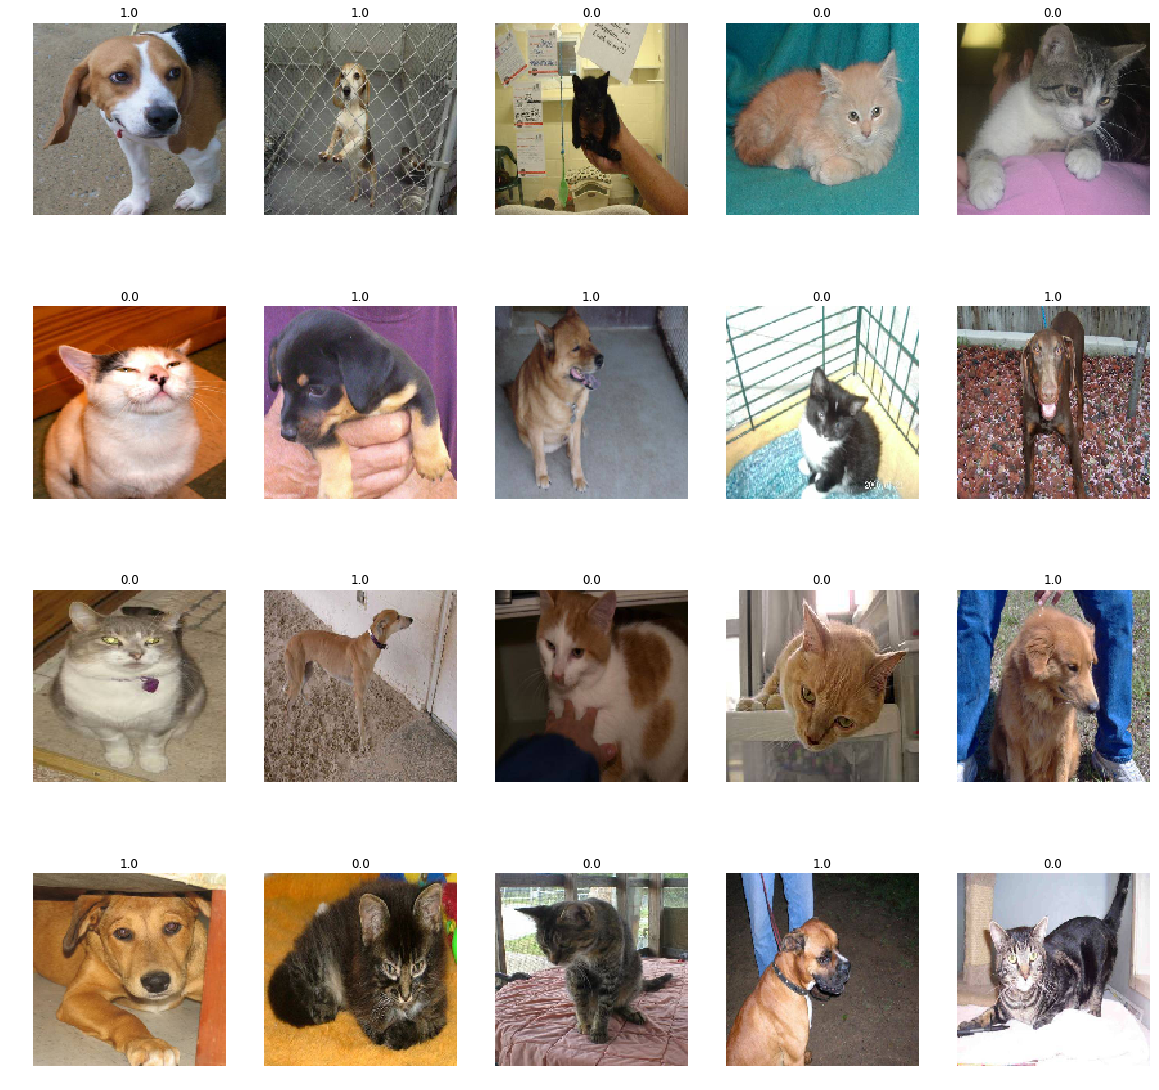

In [10]:
for data_batch,labels_batch in validation_generator:
    print("data batch shape: {}".format(data_batch.shape))
    print("labels batch shape: {}".format(labels_batch.shape))
    print(labels_batch)

    fig, axes = plt.subplots(ncols=5,nrows=4,figsize=(20,20))
    for i in range(4):
        for j in range(5):
            axes[i,j].imshow(data_batch[i*5+j].reshape(150,150,3))
            axes[i,j].set_title(labels_batch[i*5+j])
            axes[i,j].axis('off')
    break

在接下来的模型训练中，我们将使用这个图像生成器不断的产生训练数据，用于模型训练。我们将使用`fit_generator`方法。

因为数据是可以无休止的持续产生，所以图像生成器要知道在一个训练周期epoch中，需要从图像生成器中产生多个个批次数据，这个就是`steps_per_epoch`参数的作用：在从生成器中调取了`steps_per_epoch`批次之后，进入下一个epoch训练。我们的训练中，每个批次是20个样本，总体训练样本是2000个，因此遍历一次需要图像生成器产生100个批次的数据。

当使用`fit_generator`时，可以同时传入一个`validation_data`参数，这个`validation_data`可以是固定的样本集，也可以是从data_generator图像生成器中产生的。

## 网络模型Model

我们构建的小型卷积神经网络是一组交替的Conv2D和MaxPooling2D层，类似于VGG16的构建方式。我们从大小150x150的输入开始，经过一些列操作后得到尺寸为5x5的Flatten层之前的特征。

In [11]:
from keras import layers
from keras import models
from keras.utils import plot_model

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2),padding='same'))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2),padding='same'))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2),padding='same'))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2),padding='same'))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2),padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dense(units=1,activation='sigmoid'))

In [13]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 128)       73856     
__________

在编译步骤里，我们使用`RMSprop`优化器，损失函数选择`binary_crossentropy`，评价指标为`accuracy`。

In [14]:
from keras import losses,optimizers,metrics

In [15]:
model.compile(loss=losses.binary_crossentropy,
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

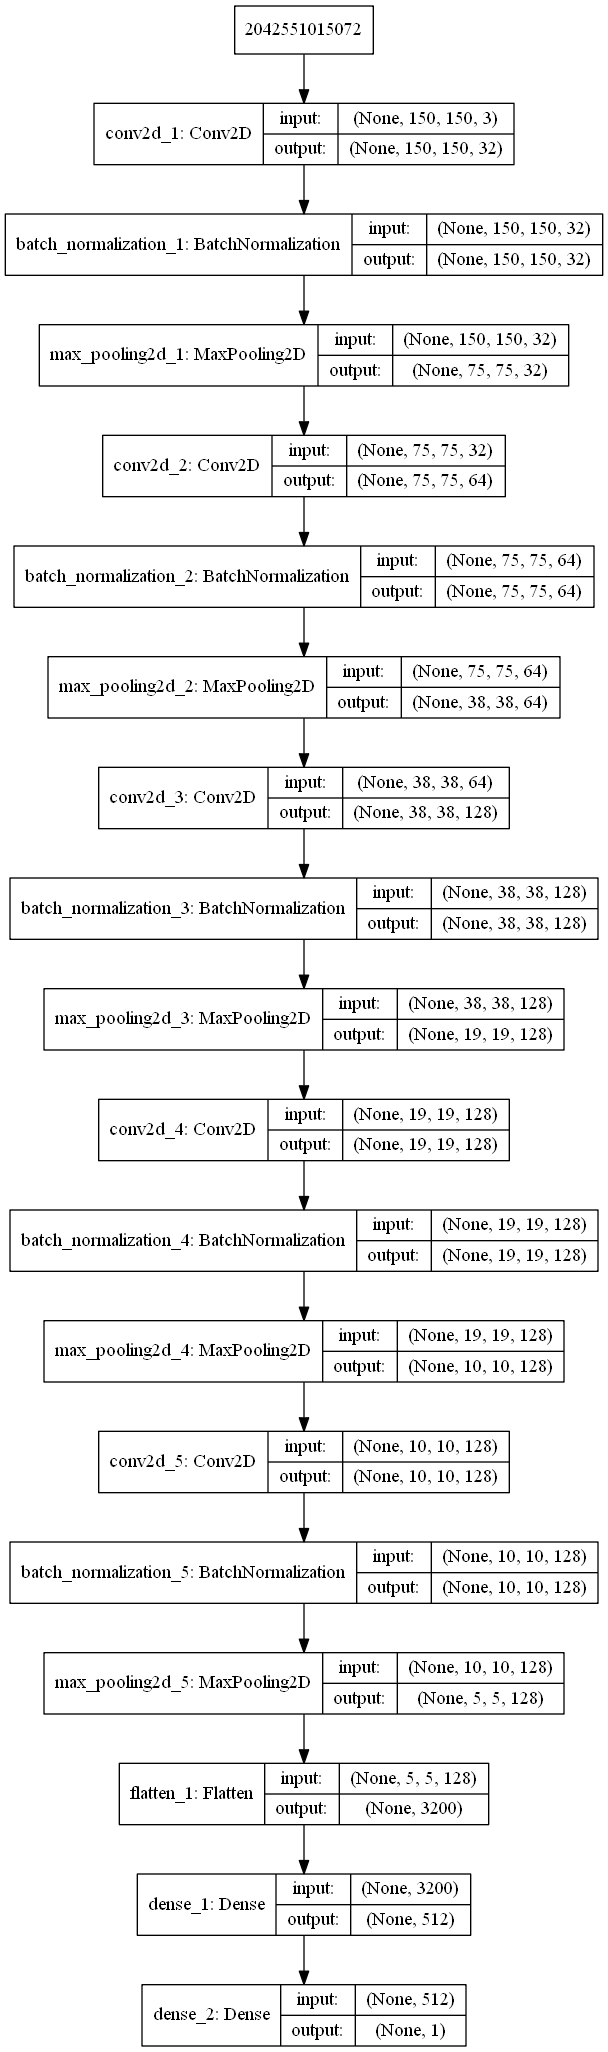

In [17]:
plot_model(model=model,to_file="images/SimpleCNN.png",show_layer_names=True,show_shapes=True)
Image("images/SimpleCNN.png")

### 训练

In [18]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50,
                              verbose=1)

Epoch 1/30
100/100 [==============================] - 23s 231ms/step - loss: 0.7746 - acc: 0.6450 - val_loss: 0.9345 - val_acc: 0.6380
Epoch 2/30
100/100 [==============================] - 22s 219ms/step - loss: 0.3776 - acc: 0.8380 - val_loss: 0.7090 - val_acc: 0.6610
Epoch 3/30
100/100 [==============================] - 22s 217ms/step - loss: 0.2203 - acc: 0.9175 - val_loss: 0.7248 - val_acc: 0.7060
Epoch 4/30
100/100 [==============================] - 22s 216ms/step - loss: 0.1301 - acc: 0.9550 - val_loss: 0.6527 - val_acc: 0.7190
Epoch 5/30
100/100 [==============================] - 22s 216ms/step - loss: 0.0654 - acc: 0.9815 - val_loss: 0.7308 - val_acc: 0.6980
Epoch 6/30
100/100 [==============================] - 22s 215ms/step - loss: 0.0467 - acc: 0.9895 - val_loss: 0.8379 - val_acc: 0.7150
Epoch 7/30
100/100 [==============================] - 22s 218ms/step - loss: 0.0377 - acc: 0.9875 - val_loss: 0.8783 - val_acc: 0.7250
Epoch 8/30
100/100 [==============================] - 2

In [19]:
model.save("models/cats_and_dogs_small_1.h5")

In [20]:
import matplotlib.pyplot as plt

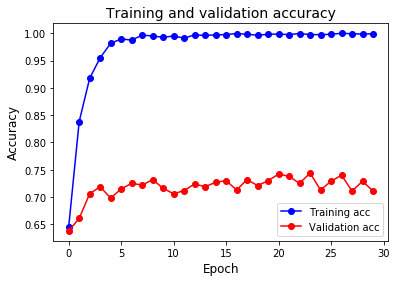

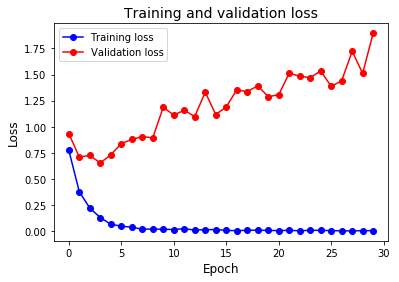

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = history.epoch

plt.plot(epochs, acc, 'o-',color='blue',label='Training acc')
plt.plot(epochs, val_acc, 'o-', color='red',label='Validation acc')
plt.title('Training and validation accuracy',fontsize=14)
plt.xlabel("Epoch",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'o-',color='blue',label='Training loss')
plt.plot(epochs, val_loss, 'o-', color='red',label='Validation loss')
plt.title('Training and validation loss',fontsize=14)
plt.xlabel("Epoch",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.legend()

plt.show()

从上图可以发现，所模型训练过程发生了严重的过拟合，训练精度达到接近100%，而验证精度一直徘徊在74%附近。从loss来看则更为清晰，训练集上的loss逐渐减小到0，而验证集的loss不降反增。

导致上述过拟合现象的原因，一方面是因为我们只有相对较少的训练数据，另外就是我们的模型表示能力过强。已有的文献给出了许多可以帮助减轻过拟合的技术，比如dropout，L1和L2正则，数据增强等。下面，我们就实验一下数据增强的效果。

In [22]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

这里我们只列举解释其中一些设置参数，更多详细信息参阅keras文档。
* `rotation_range`：是以一定角度旋转图片
* `width_shift`和`height_shift`：是在横向或纵向，以一定比例拉升或缩小图片
* `shear_range`：用于图片随机剪切变换
* `horizontal_flip`：用于没有水平不对称假设的情况下水平的随机翻转一半图像，数字辨识则不可用。
* `fill_mode`：用于填充新创建的像素的策略

In [23]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

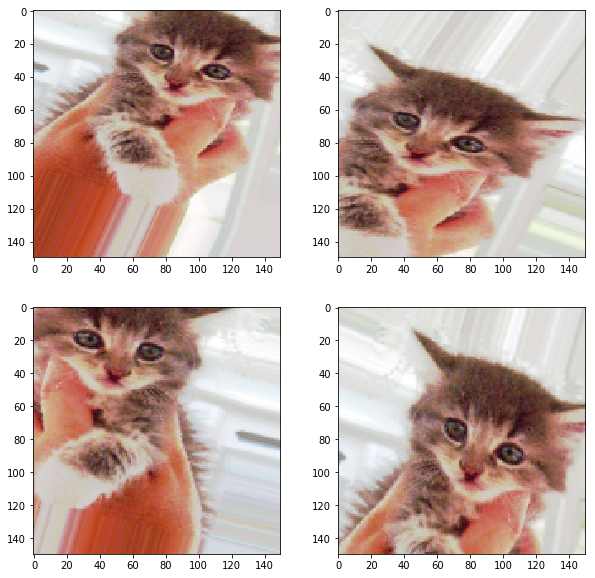

In [24]:
fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path,target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,150,150,3))

i = 0
plt.figure(figsize=(10,10))
for batch in datagen.flow(x,batch_size=1):
    plt.subplot(220+i+1)
    plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0 :
        break
    
plt.show()

如果我们使用这种数据增强配置来训练一个新的神经网络模型，我们的网络将永远不会看到完全相同的重复输入。然而，这些数据本质上还是相互关联的，因为他们都来自于少量的原始图像，我们并不能产生新的信息，我们只能重新混合现有的信息。因此，这也可能不足以完全消除过拟合。为了进一步减轻过拟合，我们在全连接层前面增加了一个dropout层。

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2),padding='same'))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2),padding='same'))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2),padding='same'))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2),padding='same'))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2),padding='same'))

model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dense(units=1,activation='sigmoid'))

In [26]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 38, 38, 128)       73856     
__________

In [27]:
model.compile(loss=losses.binary_crossentropy,
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

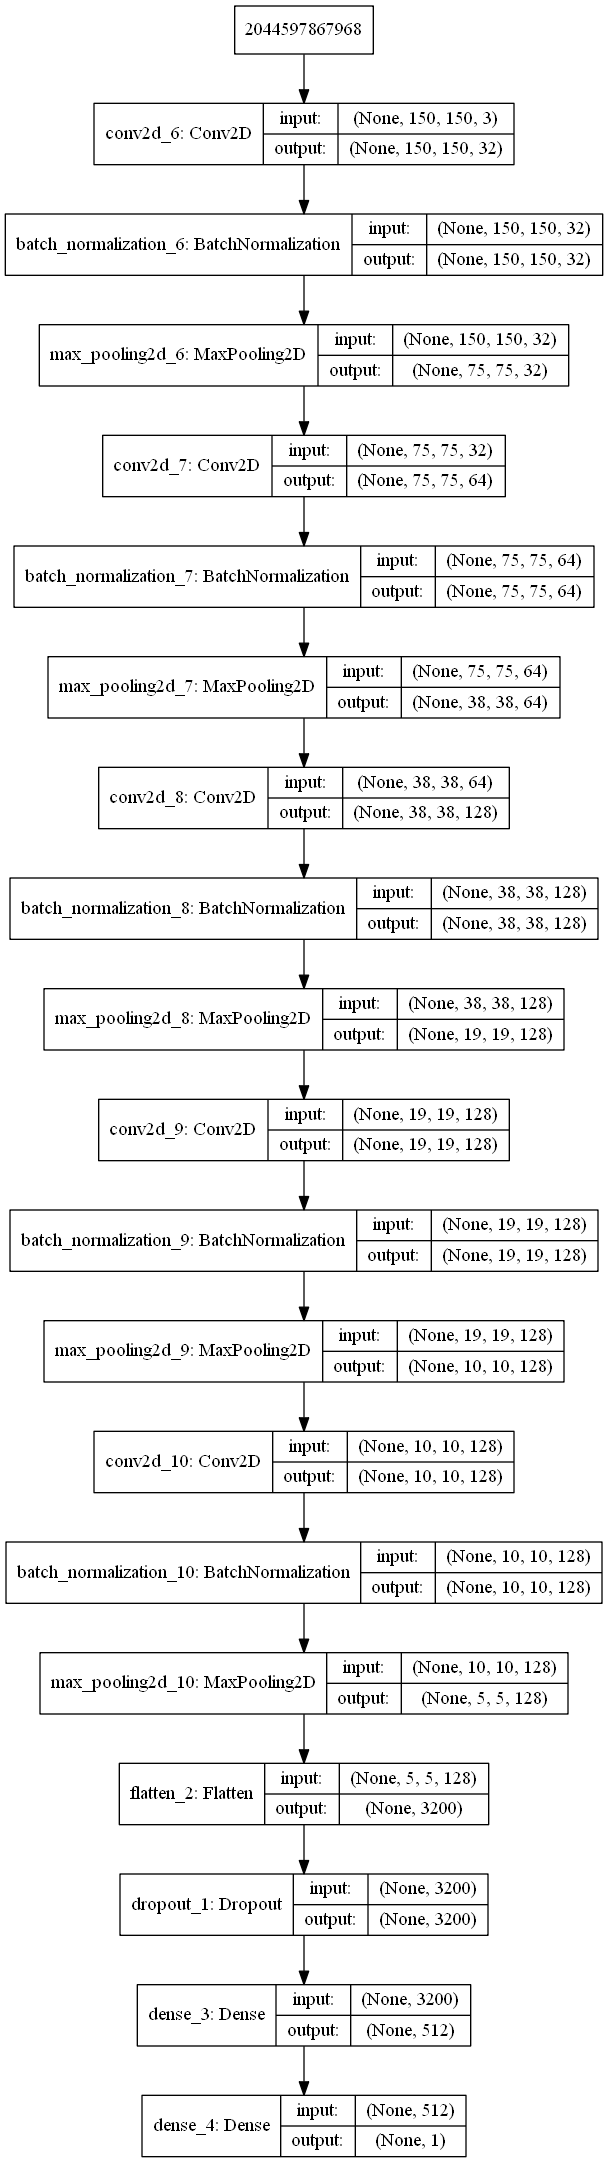

In [28]:
plot_model(model=model,to_file="images/SimpleCNN_Augmentation_dropout.png",show_layer_names=True,show_shapes=True)
Image("images/SimpleCNN_Augmentation_dropout.png")

我们使用数据增强和dropout来训练我们构建的CNN模型。

In [29]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(directory=validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=32,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50,
                              verbose=1)

Epoch 1/30
100/100 [==============================] - 47s 469ms/step - loss: 0.9240 - acc: 0.6006 - val_loss: 0.7636 - val_acc: 0.6480
Epoch 2/30
100/100 [==============================] - 50s 503ms/step - loss: 0.8118 - acc: 0.6200 - val_loss: 0.6810 - val_acc: 0.6560
Epoch 3/30
100/100 [==============================] - 50s 504ms/step - loss: 0.7136 - acc: 0.6491 - val_loss: 0.6254 - val_acc: 0.6910
Epoch 4/30
100/100 [==============================] - 50s 504ms/step - loss: 0.6821 - acc: 0.6672 - val_loss: 0.6775 - val_acc: 0.6440
Epoch 5/30
100/100 [==============================] - 50s 502ms/step - loss: 0.6675 - acc: 0.6681 - val_loss: 0.6334 - val_acc: 0.6810
Epoch 6/30
100/100 [==============================] - 53s 528ms/step - loss: 0.6258 - acc: 0.6922 - val_loss: 0.6621 - val_acc: 0.6220
Epoch 7/30
100/100 [==============================] - 50s 504ms/step - loss: 0.5940 - acc: 0.6987 - val_loss: 0.5831 - val_acc: 0.6720
Epoch 8/30
100/100 [==============================] - 5

In [31]:
model.save('cats_and_dogs_small_2.h5')

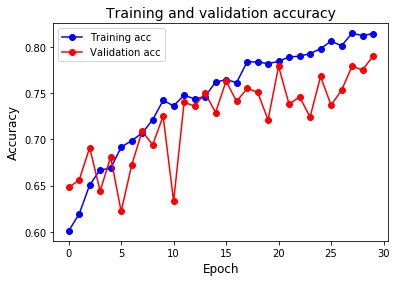

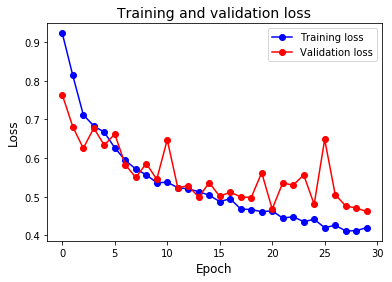

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = history.epoch

plt.plot(epochs, acc, 'o-',color='blue',label='Training acc')
plt.plot(epochs, val_acc, 'o-', color='red',label='Validation acc')
plt.title('Training and validation accuracy',fontsize=14)
plt.xlabel("Epoch",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'o-',color='blue',label='Training loss')
plt.plot(epochs, val_loss, 'o-', color='red',label='Validation loss')
plt.title('Training and validation loss',fontsize=14)
plt.xlabel("Epoch",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.legend()

plt.show()

由于数据增强和dropout的使用，我们不再有过拟合的问题，从上图也可以看出，随着epoch进一步增加，模型准确度还会有进一步的提高空间。

通过进一步利用正则化技术及调整CNN网络参数（例如每个卷积层的滤波器数量或网络层数），我们可以获得更好的准确度可以进一步提高到86%~87%。然而，只要我们从头开始训练我们自己的卷积神经网络，我们可以证明使用这么少量的数据，很难训练出高准确率的模型。为了继续提高我们模型对这个问题的性能，下一步，我们将利用预训练模型来进行进一步的研究。